In [1]:
import pandas as pd
import numpy as np


In [2]:
file_path = "tokopedia-product-reviews-2019.csv"
df = pd.read_csv(file_path)

In [3]:
# --- Proses Persiapan Data ---
# 1. Membersihkan data: Hanya gunakan baris dimana 'sold' bukan nilai kosong (NaN)
df_cleaned = df.dropna(subset=['sold', 'rating'])

In [4]:
# 2. Mengelompokkan data berdasarkan product_id untuk mendapatkan data per produk unik
#    - 'rating': kita hitung rata-ratanya (mean) untuk setiap produk
#    - 'sold': kita ambil nilai pertamanya (karena ini adalah total penjualan produk, nilainya sama)
df_produk_unik = df_cleaned.groupby('product_id').agg(
    rating_rata_rata=('rating', 'mean'),
    jumlah_terjual=('sold', 'first')
).reset_index()

In [5]:
# --- Tampilkan 5 Baris Pertama dan Nama Kolom ---
print("--- 5 Baris Pertama Data yang Akan Dianalisis ---")
print(df_produk_unik.head())

--- 5 Baris Pertama Data yang Akan Dianalisis ---
   product_id  rating_rata_rata jumlah_terjual
0     1505048          4.333333              3
1     1592922          5.000000              4
2     1592980          5.000000              1
3     1601781          4.000000              1
4     1602217          5.000000              1


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [8]:
# --- LANGKAH 1: MEMUAT DAN MEMPERSIAPKAN DATA ---

# Fungsi yang diperbaiki untuk mengubah teks penjualan menjadi angka
# Mampu menangani error jika ada teks yang tidak terduga (contoh: 'broken')
def convert_sold_to_numeric(sold_text):
    if not isinstance(sold_text, str):
        return sold_text

    try:
        sold_text = sold_text.lower().replace('terjual', '').strip()
        if 'rb' in sold_text:
            value = float(sold_text.replace('rb', '').replace(',', '.')) * 1000
        elif 'jt' in sold_text:
            value = float(sold_text.replace('jt', '').replace(',', '.')) * 1000000
        else:
            value = float(sold_text.replace('+', ''))
        return int(value)
    except ValueError:
        # Jika konversi gagal, anggap sebagai data tidak valid (NaN)
        return np.nan

# Ganti dengan path file Anda
file_path = "tokopedia-product-reviews-2019.csv"
df = pd.read_csv(file_path)

# Menggunakan nama kolom yang benar
NAMA_KOLOM_PENJUALAN = 'sold'
NAMA_KOLOM_RATING = 'rating'

# Membersihkan kolom 'sold' dan mengubahnya menjadi angka
df['penjualan_numerik'] = df[NAMA_KOLOM_PENJUALAN].apply(convert_sold_to_numeric)

# Hanya pilih kolom yang relevan dan hapus baris yang datanya kosong
df_cleaned = df[[NAMA_KOLOM_RATING, 'penjualan_numerik']].dropna()

print("--- Data setelah dibersihkan ---")
print(df_cleaned.head())
print("\nUkuran data setelah dibersihkan:", df_cleaned.shape)

--- Data setelah dibersihkan ---
   rating  penjualan_numerik
0       5                1.0
1       5               11.0
2       5               11.0
3       5                5.0
4       5              787.0

Ukuran data setelah dibersihkan: (40540, 2)



Scatter plot telah disimpan sebagai 'eda_scatterplot.png'


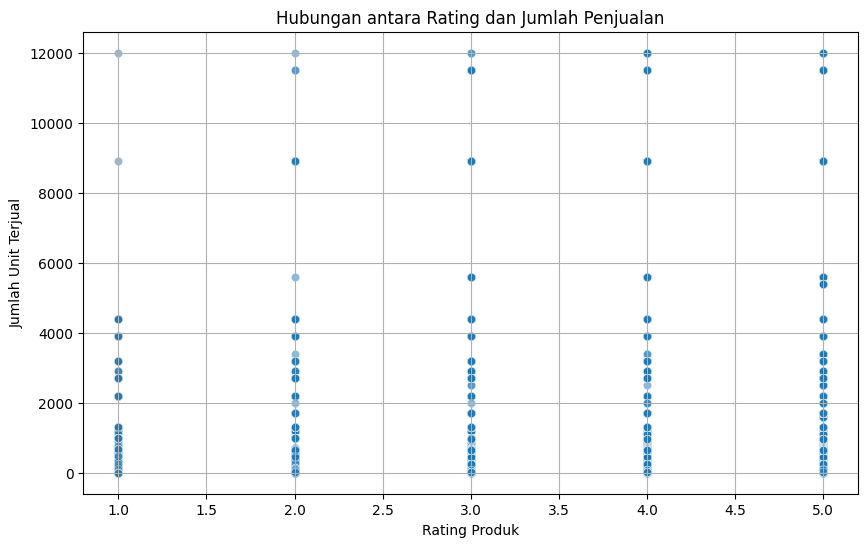

In [9]:
# --- LANGKAH 2: EKSPLORASI DATA (VISUALISASI) ---
# Membuat scatter plot untuk melihat hubungan antara rating dan penjualan
plt.figure(figsize=(10, 6))
sns.scatterplot(x=NAMA_KOLOM_RATING, y='penjualan_numerik', data=df_cleaned, alpha=0.5)
plt.title('Hubungan antara Rating dan Jumlah Penjualan')
plt.xlabel('Rating Produk')
plt.ylabel('Jumlah Unit Terjual')
plt.grid(True)
plt.savefig('eda_scatterplot.png') # Menyimpan plot sebagai gambar
print("\nScatter plot telah disimpan sebagai 'eda_scatterplot.png'")

In [10]:
# --- LANGKAH 3: PERSIAPAN DATA UNTUK MODEL ---

# Memisahkan fitur (X) dan target (y)
X = df_cleaned[[NAMA_KOLOM_RATING]]
y = df_cleaned['penjualan_numerik']

# Membagi data menjadi data latih (training) dan data uji (testing)
# 80% data untuk training, 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# --- LANGKAH 4: PELATIHAN MODEL REGRESI LINEAR ---

# Membuat instance dari model
model = LinearRegression()

# Melatih model menggunakan data training
model.fit(X_train, y_train)

print("\n--- Hasil Pelatihan Model ---")
# Menampilkan intercept dan koefisien
print(f"Intercept (titik awal penjualan saat rating = 0): {model.intercept_}")
print(f"Koefisien (peningkatan penjualan per 1 poin rating): {model.coef_[0]}")



--- Hasil Pelatihan Model ---
Intercept (titik awal penjualan saat rating = 0): 636.7517423006567
Koefisien (peningkatan penjualan per 1 poin rating): 132.12786522822594


In [12]:
# --- LANGKAH 5: PREDIKSI DAN EVALUASI MODEL ---

# Melakukan prediksi pada data test
predictions = model.predict(X_test)

# Evaluasi performa model
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, predictions)

print("\n--- Metrik Evaluasi Model ---")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")



--- Metrik Evaluasi Model ---
Mean Absolute Error (MAE): 1560.023148073169
Mean Squared Error (MSE): 6047267.766763576
Root Mean Squared Error (RMSE): 2459.119307143022
R-squared (R2): 0.0010064522921799934



Plot hasil prediksi telah disimpan sebagai 'hasil_prediksi.png'


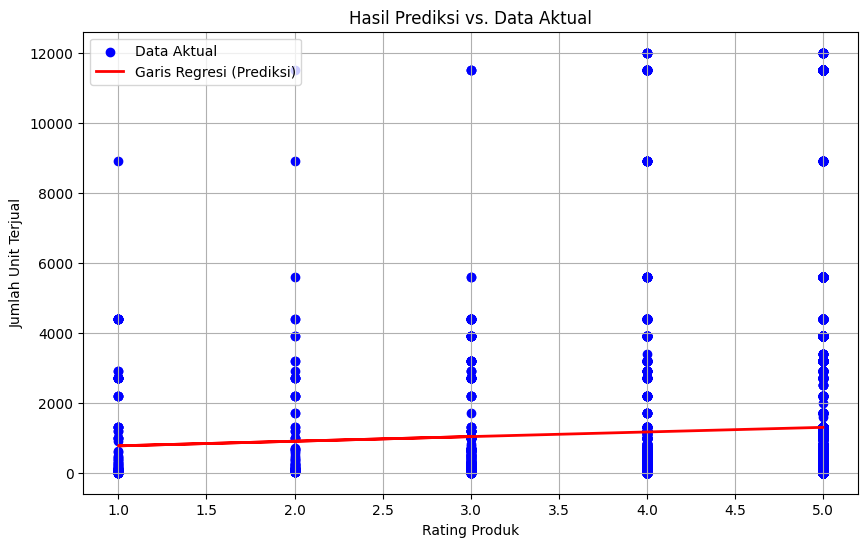

In [13]:
# --- LANGKAH 6: VISUALISASI HASIL PREDIKSI ---

plt.figure(figsize=(10, 6))
# Plot nilai aktual
plt.scatter(X_test, y_test, color='blue', label='Data Aktual')
# Plot garis regresi (hasil prediksi)
plt.plot(X_test, predictions, color='red', linewidth=2, label='Garis Regresi (Prediksi)')
plt.title('Hasil Prediksi vs. Data Aktual')
plt.xlabel('Rating Produk')
plt.ylabel('Jumlah Unit Terjual')
plt.legend()
plt.grid(True)
plt.savefig('hasil_prediksi.png') # Menyimpan plot sebagai gambar
print("\nPlot hasil prediksi telah disimpan sebagai 'hasil_prediksi.png'")

In [15]:
# File: train_model.py (Diperbarui)

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import joblib
import json

print("Memulai proses training model...")

# Fungsi pembersihan data (tidak berubah)
def convert_sold_to_numeric(sold_text):
    if not isinstance(sold_text, str):
        return sold_text
    try:
        sold_text = sold_text.lower().replace('terjual', '').strip()
        if 'rb' in sold_text:
            value = float(sold_text.replace('rb', '').replace(',', '.')) * 1000
        elif 'jt' in sold_text:
            value = float(sold_text.replace('jt', '').replace(',', '.')) * 1000000
        else:
            value = float(sold_text.replace('+', ''))
        return int(value)
    except ValueError:
        return np.nan

# Memuat dan membersihkan data
df = pd.read_csv("tokopedia-product-reviews-2019.csv")
df['penjualan_numerik'] = df['sold'].apply(convert_sold_to_numeric)
df_cleaned = df[['rating', 'penjualan_numerik']].dropna()

# Memisahkan data untuk evaluasi
X = df_cleaned[['rating']]
y = df_cleaned['penjualan_numerik']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model
model = LinearRegression()
model.fit(X_train, y_train)
print("Model berhasil dilatih.")

# Evaluasi model
predictions = model.predict(X_test)
r2 = metrics.r2_score(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print(f"R-squared: {r2}, RMSE: {rmse}")

# Menyimpan model
joblib.dump(model, 'model_regresi.joblib')
print("Model berhasil disimpan sebagai 'model_regresi.joblib'")

# **BARU**: Menyimpan hasil training untuk ditampilkan di web
training_results = {
    "r2_score": r2,
    "rmse": rmse,
    "intercept": model.intercept_,
    "coefficient": model.coef_[0],
    "data_shape": list(df_cleaned.shape)
}

with open('training_results.json', 'w') as f:
    json.dump(training_results, f, indent=4)

print("Hasil training berhasil disimpan sebagai 'training_results.json'")

Memulai proses training model...
Model berhasil dilatih.
R-squared: 0.0010064522921799934, RMSE: 2459.119307143022
Model berhasil disimpan sebagai 'model_regresi.joblib'
Hasil training berhasil disimpan sebagai 'training_results.json'
